## SSB30806: Modelling in Systems Biology

### Week 2, practical 2: Transcription leakiness
In this practical you will:
- Look at the effect of transcriptional leakiness on dose-response curves;
- Study feedback and autoregulation of transcriptional processes, and
- Observe time scale separation (as we did for the derivation of Michaelis-Menten) in another context.

Solutions will be made available on Brightspace.


### Part 1: TRANSCRIPTION LEAKINESS
Leakiness is a term often used in synthetic biology to describe background levels of transcription that takes place unregulated by an activating or inhibiting transcription factor. This mechanism allows for a measure of control. For example, you want an inhibiting transcription factor to completely shut down transcription of a lethal compound. Another example is the background transcription of an enzyme that can deal with a certain substrate to allow for a quick response to when that substrate becomes available.
Let us take a look at the effect of leakiness on dose-response curves. We first consider a system in the absence of background transcription. Consider an inducer $I$ that promotes transcription of $A_m$. In yesterday’s lecture we saw the following reactions:

\begin{equation}
\begin{aligned}
\emptyset &\overset{k_s\frac{I}{1+I}}{\longrightarrow} A_m \\
A_m &\overset{k_d}{\longrightarrow} \emptyset 
\end{aligned}
\end{equation}

### Question 1:
Write the above chemical reactions as one ODE.

<font color = 'red'>
\begin{equation}
\frac{dA_m}{dt} = k_s \frac{I}{1+I} - k_d A_m
\end{equation}
    </font>

### Question 2: 
Solve this ODE to find the steady state of $A_m$, and explain from the expression why this steady state can never be negative.

<font color = 'red'>
\begin{equation}
\frac{dA_m}{dt} = k_s \frac{I}{1+I} - k_d A_m = 0
\end{equation}
    
\begin{equation}
k_s \frac{I}{1+I} = k_d A_m
\end{equation}
    
\begin{equation}
A_m = \frac{k_s}{k_d} \frac{I}{1+I}
\end{equation}
    
Rates $k_s$ and $k_d$ are positive, as is inhibitor concentration $I$, so the steady state of $A_m$ is never negative.
    </font>

### Question 3:
Set $k_s = k_d = 1$. Implement the function in Jupyter and plot the steady state $A_m = f(I)$ for $I \in [0.1,10]$. Re-scale the $x$-axis using a logarithmic scale. (*Hint: The resulting curve should be S-shaped.*)

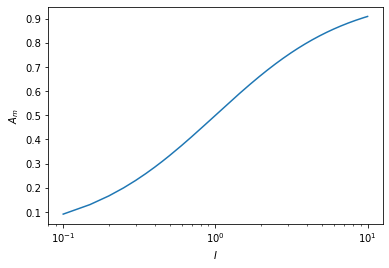

In [1]:
#import necessary packages
import numpy as np #math and arrays
from scipy.integrate import odeint #differential equations
import matplotlib.pyplot as plt #plotting
#run a "magic" command to make sure figures are rendered properly in the notebook
%matplotlib inline


def ode1(states,t,ks,kd,I):
    Am = states[0]
    dAmdt = ks * I/(I+1) - kd*Am
    return dAmdt

def Am_steady(ks,kd,I):
    return ks/kd * I/(1+I)



ks = 1
kd = 1
I = np.linspace(0.1,10,200)

plt.plot(I,Am_steady(ks,kd,I))

plt.xlabel('$I$')
plt.ylabel('$A_m$')

plt.xscale('log')

plt.show()




### Question 4:
Systematically vary $k_s$ and $k_d$ by dividing or multiplying each parameter by 2, either individually or both at the same time. What happens to the resulting dose-response curve?

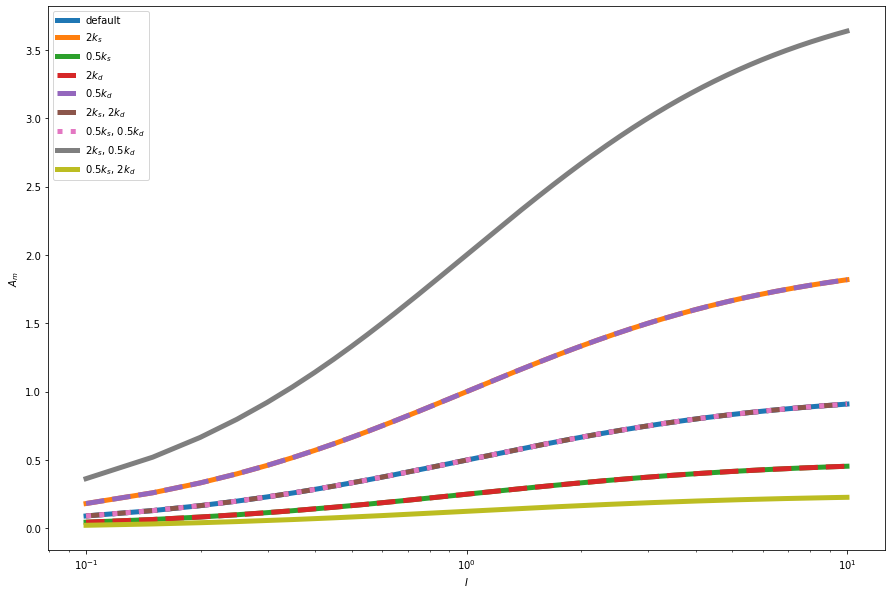

In [2]:
def Am_steady(ks,kd,I):
    return ks/kd * I/(1+I)

ks = 1
kd = 1
I = np.linspace(0.1,10,200)

linewidth = 5

plt.plot(I,Am_steady(ks,kd,I), label = 'default', linewidth = linewidth)
plt.plot(I,Am_steady(ks*2,kd,I), label = '2$k_s$', linewidth = linewidth)
plt.plot(I,Am_steady(ks/2,kd,I), label = '0.5$k_s$', linewidth = linewidth)
plt.plot(I,Am_steady(ks,kd*2,I), '--', label = '2$k_d$', linewidth = linewidth)
plt.plot(I,Am_steady(ks,kd/2,I), '--', label = '0.5$k_d$', linewidth = linewidth)
plt.plot(I,Am_steady(ks*2,kd*2,I), '--', label = '2$k_s$, 2$k_d$', linewidth = linewidth)
plt.plot(I,Am_steady(ks/2,kd/2,I), ':', label = '0.5$k_s$, 0.5$k_d$', linewidth = linewidth)
plt.plot(I,Am_steady(ks*2,kd/2,I), label = '2$k_s$, 0.5$k_d$', linewidth = linewidth)
plt.plot(I,Am_steady(ks/2,kd*2,I), label = '0.5$k_s$, 2$k_d$', linewidth = linewidth)

plt.xlabel('$I$')
plt.ylabel('$A_m$')

plt.legend()

plt.xscale('log')

fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show()

<font color='red'>
    Since $A_m$ at steady state depends on $\frac{k_s}{k_d}$, doubling or halving both $k_s$ and $k_d$ simultaneously does not alter the steady state of $A_m$.
    
</font>

Yesterday we also added background translation – leakiness – to the chemical equations. This was depicted as:
\begin{equation}
\emptyset \overset{k_0=0.01}{\longrightarrow} A_m
\end{equation}

### Question 5:
Modify the ODE from Question 1 to include this reaction, and calculate the steady state.

<font color = 'red'>
\begin{equation}
\frac{dA_m}{dt} = k_0 + k_s \frac{I}{1+I} - k_d A_m
\end{equation}
    
Steady state:
\begin{equation}
k_0 + k_s \frac{I}{1+I} - k_d A_m = 0
\end{equation}
\begin{equation}
k_0 + k_s \frac{I}{1+I} = k_d A_m
\end{equation}
\begin{equation}
A_m = \frac{k_0}{k_d} + \frac{k_s}{k_d} \frac{I}{1+I} 
\end{equation}
</font>

### Question 6:
Plot the dose-response curve of the steady state of $A_m$ for this modified model, and plot the curves for $k_0=0.1$ and $k_0=1$.

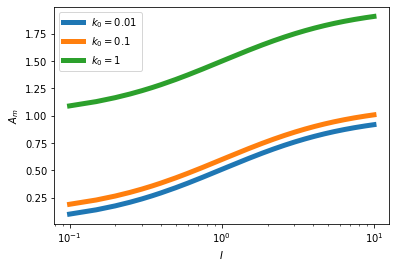

In [3]:
def Am_steady_leaky(k0,ks,kd,I):
    return k0/kd + ks/kd * I/(1+I)

ks = 1
kd = 1
I = np.linspace(0.1,10,200)

linewidth = 5

plt.plot(I,Am_steady_leaky(0.01,ks,kd,I), label = '$k_0=0.01$', linewidth = linewidth)
plt.plot(I,Am_steady_leaky(0.1,ks,kd,I), label = '$k_0=0.1$', linewidth = linewidth)
plt.plot(I,Am_steady_leaky(1,ks,kd,I), label = '$k_0=1$', linewidth = linewidth)

plt.xlabel('$I$')
plt.ylabel('$A_m$')

plt.legend()

plt.xscale('log')

fig = plt.gcf()

plt.show()

<font color='red'>
I.e., with increasing background transcription the curve is shifted upward. This is likely what you would expect: with $I=0$ the production is fully determined by the leaky transcription.
    </font>

Yesterday we also looked at how to assume inhibition rather than activation. Assume the added reaction is now:
\begin{equation}
\emptyset \overset{k_0+k_s\frac{1}{1+I}}{\longrightarrow} A_m
\end{equation}

### Question 7: 
How does the dose-response curve change now? (*Hint: Modify the ODE, calculate the steady state, and implement the model in Jupyter like before.*)

<font color = 'red'>
    ODE:
\begin{equation}
\frac{dA_m}{dt} = k_0 + k_s \frac{1}{1+I} - k_d A_m
\end{equation}
    
Steady state:
\begin{equation}
k_0 + k_s \frac{1}{1+I} - k_d A_m = 0
\end{equation}
\begin{equation}
k_0 + k_s \frac{1}{1+I} = k_d A_m
\end{equation}
\begin{equation}
A_m = \frac{k_0}{k_d} + \frac{k_s}{k_d} \frac{1}{1+I} 
\end{equation}
</font>

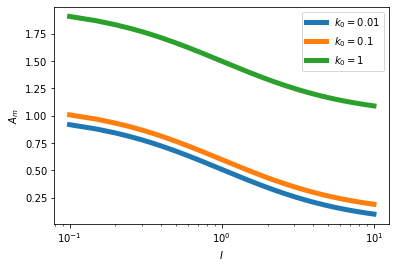

In [4]:
def Am_steady_inhibition(k0,ks,kd,I):
    return k0/kd + ks/kd * 1/(1+I)

ks = 1
kd = 1
I = np.linspace(0.1,10,200)

linewidth = 5

plt.plot(I,Am_steady_inhibition(0.01,ks,kd,I), label = '$k_0=0.01$', linewidth = linewidth)
plt.plot(I,Am_steady_inhibition(0.1,ks,kd,I), label = '$k_0=0.1$', linewidth = linewidth)
plt.plot(I,Am_steady_inhibition(1,ks,kd,I), label = '$k_0=1$', linewidth = linewidth)

plt.xlabel('$I$')
plt.ylabel('$A_m$')

plt.legend()

plt.xscale('log')

fig = plt.gcf()

plt.show()

### Part 2: AUTOREGULATION AND FEEDBACK
Now, we will replace the inducer of the previous exercise with a transcription factor. This way we can construct autoregulatory feedback loops on transcription. This is commonly referred to as a network motive; its biological mechanism is often found in nature, for instance, roughly half of the ca. 200 transcription factors in *E. coli* are autoregulated (Gao & Stock, 2018, DOI:10.1016/j.celrep.2018.08.023).

Given are the following reactions for positive autoregulation:
\begin{equation}
\emptyset \overset{k_{sm}\frac{A_p}{1+A_p}}{\longrightarrow} A_m
\end{equation}
\begin{equation}
A_m \overset{k_{dm}}{\longrightarrow} \emptyset
\end{equation}
\begin{equation}
A_m \overset{k_{sp}}{\longrightarrow} A_m + A_p
\end{equation}
\begin{equation}
A_p \overset{k_{dp}}{\longrightarrow} \emptyset
\end{equation}


### Question 8: 
Give the two ODEs for the above chemical equations for positive autoregulation.

<font color='red'>
    \begin{equation}
    \frac{dA_m}{dt} = k_{sm}\frac{A_p}{1+A_p} - k_{dm}A_m + k_{sp}A_m - k_{sp}A_m = \frac{dA_m}{dt} = k_{sm}\frac{A_p}{1+A_p} - k_{dm}A_m
    \end{equation}
    \begin{equation}
    \frac{dA_p}{dt} = k_{sp}A_m - k_{dp}A_p
    \end{equation}
    </font>

### Question 9:
Assume $k_{sm}=k_{sp}=2$, $k_{dm}=0.1$, and $k_{dp}=1$. Simulate the model in Jupyter with initial conditions $A_m(0)=A_p(0)=0.1$ for a time span from $t=0$ to $t=50$. Does the system reach a steady state, and if yes, what is it? Plot the time series to show.

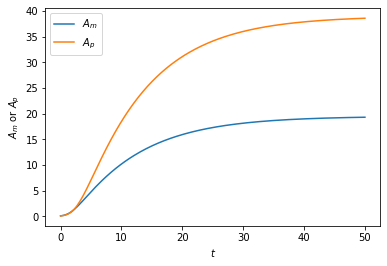

In [5]:
def ode1(states,t,ksm,ksp,kdm,kdp):
    Am, Ap = states
    
    dAmdt = ksm*Ap/(1+Ap) - kdm*Am
    dApdt = ksp*Am - kdp*Ap
    
    return [dAmdt,dApdt]


ksm = 2
ksp = 2
kdm = 0.1
kdp = 1

x0 = [0.1,0.1]
t = np.linspace(0,50,200)
pars = (ksm,ksp,kdm,kdp)

x_t = odeint(ode1,x0,t,args=pars)

Am_t = x_t[:,0]
Ap_t = x_t[:,1]

plt.plot(t,Am_t, label = '$A_m$')
plt.plot(t,Ap_t, label = '$A_p$')

plt.xlabel('$t$')
plt.ylabel('$A_m$ or $A_p$')

plt.legend()

plt.show()


### Question 10:
Consider the same model with the same settings as in Question 9, but with initial conditions $A_m(0)=A_p(0)=60$. Does the system reach a steady state now, and if yes, what is it? Plot the time series to show.

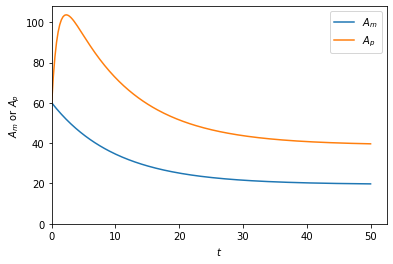

In [6]:
x0 = [60,60]
t = np.linspace(0,50,200)
pars = (ksm,ksp,kdm,kdp)

x_t = odeint(ode1,x0,t,args=pars)

Am_t = x_t[:,0]
Ap_t = x_t[:,1]

plt.plot(t,Am_t, label = '$A_m$')
plt.plot(t,Ap_t, label = '$A_p$')

plt.xlabel('$t$')
plt.ylabel('$A_m$ or $A_p$')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend()

plt.show()


<font color='red'>
    So yes, with the other initial conditions the same steady state is reached.
    </font>

### Question 11: 
Now create a plot in which the steady state value of $A_p$ is a function of $k_{dm}$. Consider increasing values of $k_{dm}$, for instance, 0.1, 0.15, 0.2, 0.25, 0.5, and 1. Each time restart the simulations at $A_m(0)=A_p(0)=60$. What happens to the steady state value of $A_p$ as $k_{dm}$ increases?

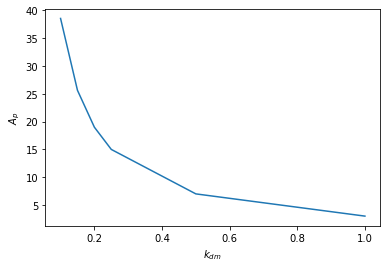

In [7]:
def ode1(states,t,ksm,ksp,kdm,kdp):
    Am, Ap = states
    
    dAmdt = ksm*Ap/(1+Ap) - kdm*Am
    dApdt = ksp*Am - kdp*Ap
    
    return [dAmdt,dApdt]


ksm = 2
ksp = 2
kdm = 0.1
kdp = 1

x0 = [0.1,0.1]
t = np.linspace(0,50,200)

kdm = 0.1
pars = (ksm,ksp,kdm,kdp)
x_t_0 = odeint(ode1,x0,t,args=pars)

kdm = 0.15
pars = (ksm,ksp,kdm,kdp)
x_t_1 = odeint(ode1,x0,t,args=pars)

kdm = 0.2
pars = (ksm,ksp,kdm,kdp)
x_t_2 = odeint(ode1,x0,t,args=pars)

kdm = 0.25
pars = (ksm,ksp,kdm,kdp)
x_t_3 = odeint(ode1,x0,t,args=pars)

kdm = 0.5
pars = (ksm,ksp,kdm,kdp)
x_t_4 = odeint(ode1,x0,t,args=pars)

kdm = 1
pars = (ksm,ksp,kdm,kdp)
x_t_5 = odeint(ode1,x0,t,args=pars)

kdms = [0.1,0.15,0.2,0.25,0.5,1]
Ap_end = [x_t_0[-1,1],x_t_1[-1,1],x_t_2[-1,1],x_t_3[-1,1],x_t_4[-1,1],x_t_5[-1,1]]

plt.plot(kdms,Ap_end)

plt.xlabel('$k_{dm}$')
plt.ylabel('$A_p$')

plt.show()

<font color='red'>
Hence, $A_p$ decreases as $k_{dm}$ increases.
    </font>
    

### Question 12:
Show algebraically that the steady state of $A_p$ is a function of $k_{dm}$. *(Hint: Follow the next steps: Substitute the numerical values of all parameters, except $k_{dm}$; Solve $\frac{dA_m}{dt}=0$ to get $A_m=f(A_p)$; Solve $\frac{dA_p}{dt}=0$ to get $A_p=g(A_m)$; Substitute $f(A_p)$ into $g(A_m)$ to get $A_p=h(A_p)$, then rearrange and solve.)*

<font color='red'>
Substitute parameter values: $\frac{dA_m}{dt} = 2 \frac{A_p}{1+A_p} - k_{dm}A_m$ ; $\quad$  $\frac{dA_p}{dt} = 2A_m-A_p$

Second hint: $2 \frac{A_p}{1+A_p} - k_{dm}A_m = 0$ ; $\quad$  $2 \frac{A_p}{1+A_p} = k_{dm}A_m$ ; $\quad$  $A_m = \frac{2}{k_{dm}} \frac{A_p}{1+A_p}$

Third hint: $2A_m-A_p = 0$ ; $\quad$ $A_p = 2A_m$

Fourth hint: $A_p = 2A_m = \frac{4}{k_{dm}} \frac{A_p}{1+A_p}$

Rearranging: 
    
$A_p = \frac{4}{k_{dm}} \frac{A_p}{1+A_p}$
    
$A_p (1+A_p)= \frac{4}{k_{dm}} A_p$
    
$A_p^2 + A_p - \frac{4}{k_{dm}} A_p = 0$
    
$A_p(A_p + 1 - \frac{4}{k_{dm}} ) = 0$
    
This gives $A_p=0$ (biologically possible) or:
    
$A_p + 1 - \frac{4}{k_{dm}} = 0$
    
$A_p = \frac{4}{k_{dm}} - 1$
    
As $k_{dm}$ is in the denominator, increasing it will decrease $A_p$, i.e., the steady state.
</font>

While the previous was an example with feedback involving a single component, many feedback loops in biological systems involve two or more components. Consider the following system with the reactions:

\begin{equation}
\emptyset \overset{k_{sm1}\frac{1}{1+B_p}}{\longrightarrow} A_m
\end{equation}
\begin{equation}
A_m \overset{k_{dm1}}{\longrightarrow} \emptyset
\end{equation}
\begin{equation}
A_m \overset{k_{sp1}}{\longrightarrow} A_m + A_p
\end{equation}
\begin{equation}
A_p \overset{k_{dp1}}{\longrightarrow} \emptyset
\end{equation}
\begin{equation}
\emptyset \overset{k_{sm2}\frac{A_p}{1+A_p}}{\longrightarrow} B_m
\end{equation}
\begin{equation}
B_m \overset{k_{dm2}}{\longrightarrow} \emptyset
\end{equation}
\begin{equation}
B_m \overset{k_{sp2}}{\longrightarrow} B_m + B_p
\end{equation}
\begin{equation}
B_p \overset{k_{dp2}}{\longrightarrow} \emptyset
\end{equation}


### Question 13:
Give the ODEs of this system and simulate the system from $t=0$ to $t=100$, setting $k_{sm1}=k_{sm2}=1$, $k_{dm1}=k_{dm2}=0.1$, $k_{sp1}=k_{sp2}=0.25$, $k_{dp1}=k_{dp2}=0.5$, and as initial conditions, set all variables to $1$. Describe the type of behaviour you see *(Remark: We will discuss this behaviour more in-depth in the coming weeks.)*

<font color='red'>
    ODEs:
\begin{equation}
\begin{aligned}
\frac{dA_m}{dt} &= k_{sm1}\frac{1}{1+B_p} - k_{dm1}A_m \\
\frac{dA_p}{dt} &= k_{sp1}A_m - k_{dp1}A_p \\
\frac{dB_m}{dt} &= k_{sm2}\frac{A_p}{1+A_p} - k_{dm2} B_m \\
\frac{dB_p}{dt} &= k_{sp2}B_m - k_{dp2}B_p
\end{aligned}
\end{equation}
    
These produce damped oscillations:
    </font>

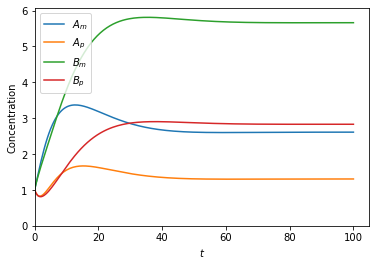

In [8]:
def ode2(states,t,ksm1,ksm2,kdm1,kdm2,ksp1,ksp2,kdp1,kdp2):
    Am, Ap, Bm, Bp = states
    dAmdt = ksm1/(1+Bp) - kdm1*Am
    dApdt = ksp1*Am - kdp1*Ap
    dBmdt = ksm2*Ap/(1+Ap) - kdm2*Bm
    dBpdt = ksp2*Bm - kdp2*Bp
    
    return [dAmdt,dApdt,dBmdt,dBpdt]


ksm1 = 1
ksm2 = 1
kdm1 = 0.1
kdm2 = 0.1
ksp1 = 0.25
ksp2 = 0.25
kdp1 = 0.5
kdp2 = 0.5

pars = (ksm1,ksm2,kdm1,kdm2,ksp1,ksp2,kdp1,kdp2)
x0 = [1,1,1,1]
t = np.linspace(0,100,200)

x_t = odeint(ode2,x0,t,args=pars)

Am_t = x_t[:,0]
Ap_t = x_t[:,1]
Bm_t = x_t[:,2]
Bp_t = x_t[:,3]

plt.plot(t,Am_t,label = '$A_m$')
plt.plot(t,Ap_t,label = '$A_p$')
plt.plot(t,Bm_t,label = '$B_m$')
plt.plot(t,Bp_t,label = '$B_p$')

plt.legend()

plt.xlabel('$t$')
plt.ylabel('Concentration')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()
